<a href="https://colab.research.google.com/github/fares-mldev/uns-pdi2021/blob/main/tp4/PDI_TP4_Histograma_Luminancia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctico TP4 (Histograma de Luminancias)

* Generar una función que como parámetro de entrada tome la luminacia de una imagen y un numero entero de contadores y como salida obtengamos el histograma respectivo. (la función debe ser desarrollada por ustedes no mediante funciones de librería que ya la implementen). Mostrar el histograma respectivo para 5 valores de contadores diferentes.

* Buscar dos imágenes con problemas de iluminación (una oscura y otra muy brillante, como las mostradas en las filminas de la clase Pag. 7). Verificar la premisa de que al multiplicar la luminancia por un valor alfa, el problema de iluminación no se corrige. Mostrar la imagen original, la resultante y sus respectivos histogramas, para un valor alfa dado.

* Implementar las funciones: Lineal a trozos para un valor Y_min y Y_max como parámetros de la función, raíz cuadrada y potencia cuadrática. Para estas usar las imágenes anteriores y mostrar cómo cambio la imagen y el histograma después de aplicar el filtro a la imagen.


In [1]:
#@title Imports

# Import numpy
import numpy as np

# Import imageio
import imageio as iio

# Import matplotlib
import matplotlib.pyplot as plt

In [2]:
#@title Image utils

# Images URL list 
url_dict = {}
url_dict["tree"] = "https://github.com/fares-mldev/uns-pdi2021/raw/main/tp4/img/1_Tree.jpg"
url_dict["jupiter"] = "https://github.com/fares-mldev/uns-pdi2021/raw/main/tp4/img/2_jupiter.jpg"
url_dict["water"] = "https://github.com/fares-mldev/uns-pdi2021/raw/main/tp4/img/3_water.jpg"
url_dict["dunes"] = "https://github.com/fares-mldev/uns-pdi2021/raw/main/tp4/img/4_dunes.jpg"
url_dict["mountains"] = "https://github.com/fares-mldev/uns-pdi2021/raw/main/tp4/img/5_mountains.jpg"

def get_image(image: str) -> np.array:
    '''
    Downloads specified image from the web and returns it as a numpy array
    '''
    # Read image from file
    img = iio.imread(url_dict[image])

    # Return image
    return np.asarray(img)

# RGB to YIQ space transformation matrix
rgb_to_yiq = [[0.299, 0.587, 0.114],
              [0.595716, -0.274453, -0.321263],
              [0.211456, -0.522591, 0.311135]]

# YIQ to RGB space transformation matrix
yiq_to_rgb = [[1, 0.9663, 0.6210],
              [1, -0.2721, -0.6474],
              [1, -1.1070, 1.7046]]

def plot_img(img: np.array, ax = None):
  '''
  Plots image using matplotlib 
  '''

  # If no axis sprecified get handle
  if ax is None:
    ax = plt.gca()

  # Show image
  ax.imshow(img)

def describe_img(img: np.array):
  '''
  Prints image properties
  '''
  print("Image shape (height,width,channels):", img.shape)
  print("Element type:", img.dtype)
  print("Total number of pixels:",img.size)
  print("Pixels per channel:", int(img.size/img.shape[2]))
  print("min-max value of channel 0:",img[:,:,0].min(),img[:,:,0].max())
  print("min-max value of channel 1:",img[:,:,1].min(),img[:,:,1].max())
  print("min-max value of channel 2:",img[:,:,2].min(),img[:,:,2].max())
  
def convert_rgb2yiq(img_rgb: np.array) -> np.array:
  '''
  Converts an RGB image to YIQ space
  '''
  
  # Normalize image
  img_rgb_n = img_rgb.astype(np.float64) / 255.0  
  
  # Apply transformation
  img_yiq = np.dot(img_rgb_n,rgb_to_yiq)
  
  # Clip to limits

  # Return YIQ image
  return img_yiq

def convert_yiq2rgb(img_yiq: np.array) -> np.array:
  '''
  Converts an YIQ image to RGB space
  '''

  # Apply transformation
  img_rgb_n= np.dot(img_yiq,yiq_to_rgb)
  
  # Clip image 
  img_rgb = img_rgb_n.clip(0,1) * 255.0
  
  # Return RGB image
  return img_rgb.astype(np.uint8) 

## Generación de Histograma

Se crea la función `hist_ch()` que toma como entrada un canal de una imagen, un número de bins y límites (por defecto 0 a 1). La misma devuelve dos vectores: uno con las cuentas en cada bin, y otro con el límite inferior de cada bin. 

Luego, se genera un aplicativo que permite seleccionar una imagen y visualizarla junto con su canal de luminancia y el histograma del mismo, se realizan pruebas con 10 y 50 bins, prefiriendose el último para el resto de los ejercicios

Se observa que las imágenes `tree`, `water`, y `dunes` presentan una buena distribución de luminancias en todo el rango, mientras que `jupiter` ocupa sólo luminancias medias-bajas y `mountains` las medias-altas.

Se seleccionan estas dos imágenes para el resto de los ejercicios.

In [3]:
#@title Código: Histograma

def hist_ch(ch: np.array, nbins = 10, lims = [0,1]):
  '''
  Input: 
    ch: image channel
    nbins: number of aggregation bins
    lims: list containing lower and upper bounds 
  Returns: 
    hist: count on each bin
    bin_starts: Start value of each bin
  '''

  # Calculate bin width
  bin_width = (np.float64(lims[1]) - np.float64(lims[0])) / np.float64(nbins)

  # Calculate bin starts
  bin_starts = np.linspace(lims[0] , lims[1]-bin_width, num=nbins)
  bin_ends = bin_starts + bin_width

  # Create 
  hist = np.empty_like(bin_starts)

  # For each bin, count number of pixeles 
  for idx,bin in enumerate(hist):
    in_bin = np.logical_and(ch >= bin_starts[idx], ch < bin_ends[idx])
    hist[idx] = in_bin.sum()

  # Border condition
  last = ch == bin_ends[-1]
  hist[-1] += last.sum()

  return hist, bin_starts




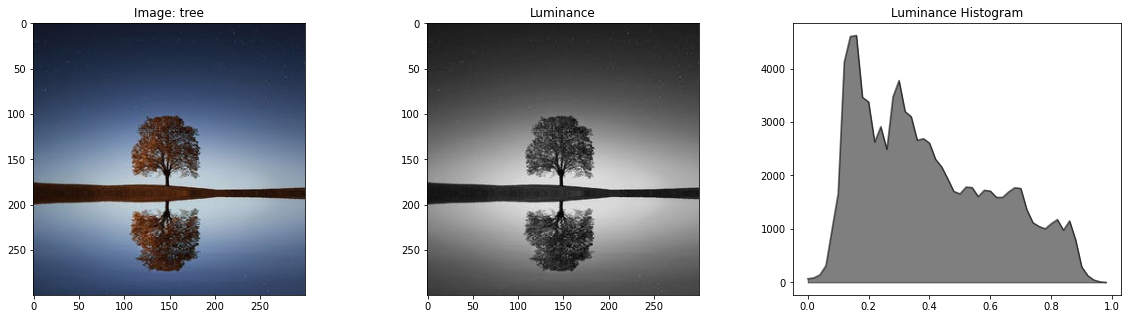

In [11]:
#@title Gráfico: Histograma { run: "auto" }
#@markdown Select Image
image = "tree" #@param ["tree","jupiter","water","dunes","mountains"]
#@markdown Choose number of bins
nbins = 50 #@param {type:"slider", min:2, max:50, step:1}

# Get image
im = get_image(image)

# Convert to YIQ space
im_yiq = convert_rgb2yiq(im)

# Get Luminance channel only
im_y = im_yiq[:,:,0] 

# Set figure properties
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(20,5)

# Axis 0 - Show image
axes[0].imshow(im)
axes[0].set_title(f'Image: {image:s}')

# Axis 1 - Show Y channel
axes[1].imshow(im_y,"gray")
axes[1].set_title('Luminance')

# Axis 2 - Show Y channel histogram
hist, bins = hist_ch(im_y,nbins)
axes[2].plot(bins,hist,color='k',alpha = 0.5)
axes[2].fill_between(bins, hist, color='k',alpha = 0.5)
axes[2].set_title('Luminance Histogram')

# Write results to file
fn = f'histogram_{image:s}_nbins_{nbins:d}'
fig.savefig(fn)

## Correccion por alfa

Se implementa una corrección de luminancia por alpha `correct_alpha()`. En la misma se multiplica el canal de luminancia Y por un número (alpha) y luego se limita el valor resultante entre 0 y 1. 

Al aplicar correcciones de `alpha > 1` las luminancias se desplazan hacia los valores altos,produciendose clipping.

Al aplicar correcciones de `alpha < 1` las luminancias se desplazan hacia los valores bajos.

En ambos casos el contraste se ve disminuido porque el histograma se localiza en una región del rango.

En la imagen `jupiter`, es posible elevar la luminancia con `alpha = 2`, pero esto también afecta a los valores del fondo, produciéndose un efecto indeseado. Es notable la saturación en las zonas mas brillantes de la imagen.

En la imagen `mountains`, es posible reducir la luminancia mediante `alpha = 0.5`, pero el histograma se localiza en los valores bajos con la consiguiente pérdida de contraste.


In [5]:
#@title Código: correccion alpha

def correct_alpha(im: np.array, alpha = 1):
  # Convert to YIQ space
  im_yiq = convert_rgb2yiq(im)

  # Apply alpha correction and clip between 0 and 1
  im_yiq[:,:,0] = np.clip(im_yiq[:,:,0] * alpha,0,1) 

  # Convert back to RGB space
  im_corr = convert_yiq2rgb(im_yiq)

  return im_corr

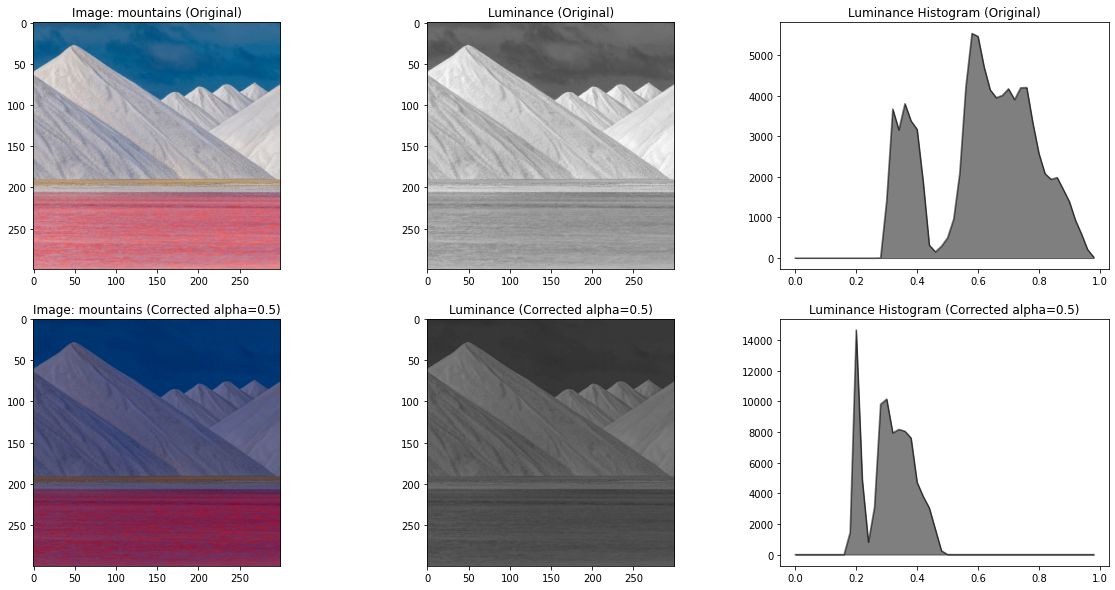

In [6]:
#@title Gráfico: corrección alpha { run: "auto" }
#@markdown Select Image
image = "mountains" #@param ["jupiter","mountains"]
#@markdown Choose alpha
alpha = 0.5 #@param {type:"slider", min:0, max:4.0, step:0.1}

# Number of bins
nbins = 50

# Get image
im = get_image(image)
# Convert to YIQ space
im_yiq = convert_rgb2yiq(im)
# Get Luminance channel only
im_y = im_yiq[:,:,0] 

# Correct image
im_corr = correct_alpha(im,alpha=alpha)
# Convert to YIQ space
im_yiq_corr = convert_rgb2yiq(im_corr)
# Get Luminance channel only
im_y_corr = im_yiq_corr[:,:,0] 

# Set figure properties
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(20,10)

# Axis 0,0 - Show Original image
axes[0,0].imshow(im)
axes[0,0].set_title(f'Image: {image:s} (Original)')

# Axis 0,1 - Show Original Y channel
axes[0,1].imshow(im_y,"gray",vmin=0, vmax=1)
axes[0,1].set_title('Luminance (Original)')

# Axis 0,2 - Show Original Y channel histogram
hist, bins = hist_ch(im_y,nbins)
axes[0,2].plot(bins,hist,color='k',alpha = 0.5)
axes[0,2].fill_between(bins, hist, color='k',alpha = 0.5)
axes[0,2].set_title('Luminance Histogram (Original)')

# Axis 1,0 - Show Corrected image
axes[1,0].imshow(im_corr)
axes[1,0].set_title(f'Image: {image:s} (Corrected alpha={alpha:.1f})')

# Axis 1,1 - Show Corrected Y channel
axes[1,1].imshow(im_y_corr,"gray",vmin=0, vmax=1)
axes[1,1].set_title(f'Luminance (Corrected alpha={alpha:.1f})')

# Axis 1,2 - Show CorrectedY channel histogram
hist, bins = hist_ch(im_y_corr,nbins)
axes[1,2].plot(bins,hist,color='k',alpha = 0.5)
axes[1,2].fill_between(bins, hist, color='k',alpha = 0.5)
axes[1,2].set_title(f'Luminance Histogram (Corrected alpha={alpha:.1f})')

# Write results to file
fn = f'corr_{image:s}_alpha_{alpha:.1f}'
fig.savefig(fn.replace('.','_'))

## Correccion por cuadrado/raiz

Se implementan correcciones de luminancia por cuadrado `correct_lum_square()` y raiz `correct_lum_sqrt()`. 
Estas correcciones operan en forma similar al alpha en que desplazan el histograma hacia valores altos (sqrt) o valores bajos (square), disminuyendo el contraste. La diferencia es que lo realizan sin producir clipping. 

En la imagen `jupiter`, aplicar la **raíz** eleva y comprime el histograma hacia  la región media. Nuevamente se nota el efecto indeseado de aumentar la luminancia del fondo.

En la imagen `mountains`, aplicar el **cuadrado** hace que el histograma se localice en los valores bajos de forma similar al caso del alpha, pero con menor pérdida de contraste. 

In [7]:
#@title Código: corrección cuadrado/raiz

def correct_lum_square(im: np.array):
  # Convert to YIQ space
  im_yiq = convert_rgb2yiq(im)

  # Apply alpha correction and clip between 0 and 1
  im_yiq[:,:,0] = np.clip(np.square(im_yiq[:,:,0]),0,1) 

  # Convert back to RGB space
  im_corr = convert_yiq2rgb(im_yiq)

  return im_corr

def correct_lum_sqrt(im: np.array):
  # Convert to YIQ space
  im_yiq = convert_rgb2yiq(im)

  # Apply alpha correction and clip between 0 and 1
  im_yiq[:,:,0] = np.clip(np.sqrt(im_yiq[:,:,0]),0,1)

  # Convert back to RGB space
  im_corr = convert_yiq2rgb(im_yiq)

  return im_corr



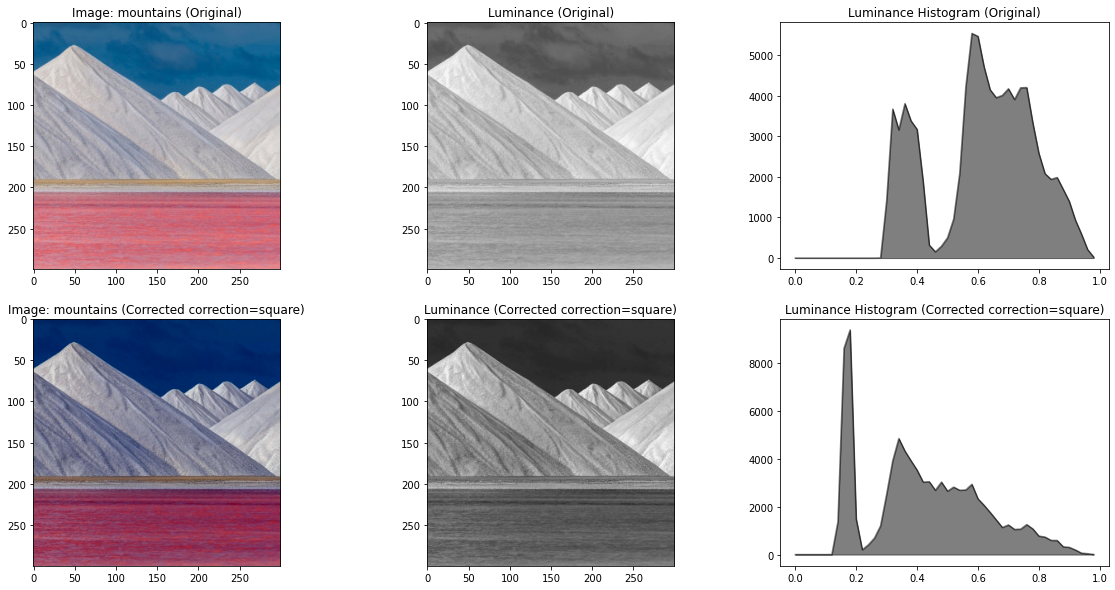

In [8]:
#@title Gráfico: corrección cuadrado/raiz { run: "auto" }
#@markdown Select Image
image = "mountains" #@param ["jupiter","mountains"]
#@markdown Choose operation
correction = "square" #@param ["square","sqrt"]

# Number of bins
nbins = 50

# Get image
im = get_image(image)
# Convert to YIQ space
im_yiq = convert_rgb2yiq(im)
# Get Luminance channel only
im_y = im_yiq[:,:,0] 

# Correct image
im_corr = np.empty_like(im)
if correction == 'square':
  im_corr = correct_lum_square(im)
if correction == 'sqrt':
  im_corr = correct_lum_sqrt(im)
  
# Convert to YIQ space
im_yiq_corr = convert_rgb2yiq(im_corr)


# Get Luminance channel only
im_y_corr = im_yiq_corr[:,:,0] 

# Set figure properties
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(20,10)

# Axis 0,0 - Show Original image
axes[0,0].imshow(im)
axes[0,0].set_title(f'Image: {image:s} (Original)')

# Axis 0,1 - Show Original Y channel
axes[0,1].imshow(im_y,"gray",vmin=0, vmax=1)
axes[0,1].set_title('Luminance (Original)')

# Axis 0,2 - Show Original Y channel histogram
hist, bins = hist_ch(im_y,nbins)
axes[0,2].plot(bins,hist,color='k',alpha = 0.5)
axes[0,2].fill_between(bins, hist, color='k',alpha = 0.5)
axes[0,2].set_title('Luminance Histogram (Original)')

# Axis 1,0 - Show Corrected image
axes[1,0].imshow(im_corr)
axes[1,0].set_title(f'Image: {image:s} (Corrected correction={correction:s})')

# Axis 1,1 - Show Corrected Y channel
axes[1,1].imshow(im_y_corr,"gray",vmin=0, vmax=1)
axes[1,1].set_title(f'Luminance (Corrected correction={correction:s})')

# Axis 1,2 - Show CorrectedY channel histogram
hist, bins = hist_ch(im_y_corr,nbins)
axes[1,2].plot(bins,hist,color='k',alpha = 0.5)
axes[1,2].fill_between(bins, hist, color='k',alpha = 0.5)
axes[1,2].set_title(f'Luminance Histogram (Corrected correction={correction:s})')

# Write results to file
fn = f'corr_{image:s}_{correction:s}'
fig.savefig(fn.replace('.','_'))

## Correccion por min-max

Finalmente se implementa una corrección de luminancia por minimo y máximo `correct_lum_minmax()`. 
La misma trabaja "estirando" el histograma para cubrir la totalidad del rango 0-1. Para determinar el mínimo y el máximo se utilizan percentiles *q* y *1-q*, donde *q* varía entre 2% y 5%.

Al aplicar esta corrección en cualquiera de las imágenes, se aprecia un aumento del contraste, enfatizándose la diferencia entre las altas y bajas luminancias.
Al usar `q=5` se aprecia una ligera saturación en los valores límite, visible como una pérdida de contraste en las zonas más brillantes/oscuras de las imágenes. La saturación se aprecia también en el histograma como un aumento en las cuentas de los valores extremos. 


In [9]:
#@title Código: correccion min-max

def correct_lum_minmax(im: np.array, q=5):
  # Convert to YIQ space
  im_yiq = convert_rgb2yiq(im)

  min = np.percentile(im_yiq[:,:,0], q) 
  max = np.percentile(im_yiq[:,:,0], 100-q) 
  
  # Apply alpha correction and clip between 0 and 1
  im_yiq[:,:,0] = np.clip((im_yiq[:,:,0] - min) / (max-min) ,0,1) 

  # Convert back to RGB space
  im_corr = convert_yiq2rgb(im_yiq)

  return im_corr

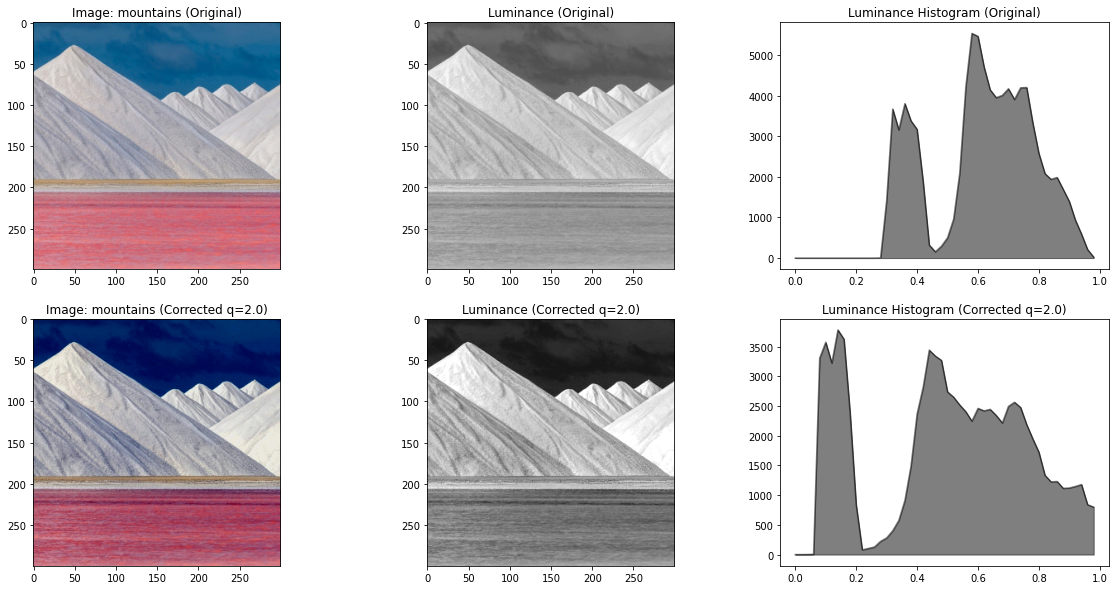

In [10]:
#@title  Gráfico: corrección min-max { run: "auto" }
#@markdown Select Image
image = "mountains" #@param ["jupiter","mountains"]
#@markdown Choose percentile for min/max detection
q = 2 #@param {type:"slider", min:2, max:5, step:1}

# Number of bins
nbins = 50

# Get image
im = get_image(image)
# Convert to YIQ space
im_yiq = convert_rgb2yiq(im)
# Get Luminance channel only
im_y = im_yiq[:,:,0] 

# Correct image
im_corr = correct_lum_minmax(im,q=q)
# Convert to YIQ space
im_yiq_corr = convert_rgb2yiq(im_corr)
# Get Luminance channel only
im_y_corr = im_yiq_corr[:,:,0] 

# Set figure properties
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(20,10)

# Axis 0,0 - Show Original image
axes[0,0].imshow(im)
axes[0,0].set_title(f'Image: {image:s} (Original)')

# Axis 0,1 - Show Original Y channel
axes[0,1].imshow(im_y,"gray",vmin=0, vmax=1)
axes[0,1].set_title('Luminance (Original)')

# Axis 0,2 - Show Original Y channel histogram
hist, bins = hist_ch(im_y,nbins)
axes[0,2].plot(bins,hist,color='k',alpha = 0.5)
axes[0,2].fill_between(bins, hist, color='k',alpha = 0.5)
axes[0,2].set_title('Luminance Histogram (Original)')

# Axis 1,0 - Show Corrected image
axes[1,0].imshow(im_corr)
axes[1,0].set_title(f'Image: {image:s} (Corrected q={q:.1f})')

# Axis 1,1 - Show Corrected Y channel
axes[1,1].imshow(im_y_corr,"gray",vmin=0, vmax=1)
axes[1,1].set_title(f'Luminance (Corrected q={q:.1f})')

# Axis 1,2 - Show CorrectedY channel histogram
hist, bins = hist_ch(im_y_corr,nbins)
axes[1,2].plot(bins,hist,color='k',alpha = 0.5)
axes[1,2].fill_between(bins, hist, color='k',alpha = 0.5)
axes[1,2].set_title(f'Luminance Histogram (Corrected q={q:.1f})')

# Write results to file
fn = f'corr_{image:s}_q_{q:.1f}'
fig.savefig(fn.replace('.','_'))